**Import Libraries**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import folium
from folium.plugins import HeatMap


In [2]:

chunks = pd.read_csv("/content/drive/MyDrive/Prodigy_Task/US_Accidents_March23.csv", chunksize=50000)  # loads 500k rows at a time
df = pd.concat(chunks)
df.head()


,ID,Source,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),...,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight
0,A-1,Source2,3,2016-02-08 05:46:00,2016-02-08 11:00:00,39.865147,-84.058723,NaN,NaN,0.01,...,False,False,False,False,False,False,Night,Night,Night,Night
1,A-2,Source2,2,2016-02-08 06:07:59,2016-02-08 06:37:59,39.928059,-82.831184,NaN,NaN,0.01,...,False,False,False,False,False,False,Night,Night,Night,Day
2,A-3,Source2,2,2016-02-08 06:49:27,2016-02-08 07:19:27,39.063148,-84.032608,NaN,NaN,0.01,...,False,False,False,False,True,False,Night,Night,Day,Day
3,A-4,Source2,3,2016-02-08 07:23:34,2016-02-08 07:53:34,39.747753,-84.205582,NaN,NaN,0.01,...,False,False,False,False,False,False,Night,Day,Day,Day
4,A-5,Source2,2,2016-02-08 07:39:07,2016-02-08 08:09:07,39.627781,-84.188354,NaN,NaN,0.01,...,False,False,False,False,True,False,Day,Day,Day,Day


In [5]:
df['Start_Time'] = pd.to_datetime(df['Start_Time'], format='mixed')
df['Hour'] = df['Start_Time'].dt.hour
df['Month'] = df['Start_Time'].dt.month
df['DayOfWeek'] = df['Start_Time'].dt.day_name()

/tmp/ipython-input-6-3583360789.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Hour', data=df, palette='coolwarm')


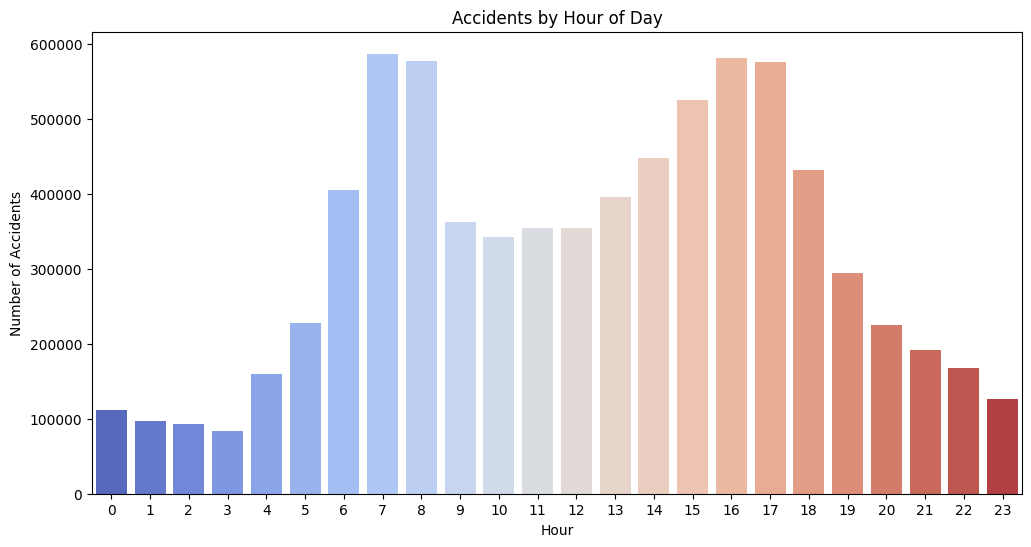

In [6]:
plt.figure(figsize=(12,6))
sns.countplot(x='Hour', data=df, palette='coolwarm')
plt.title('Accidents by Hour of Day')
plt.xlabel('Hour')
plt.ylabel('Number of Accidents')
plt.show()


- Peak hours: 7–8 AM and 4–6 PM.

- This aligns with rush hours (commuting to/from work).

- Lowest accidents: 2–4 AM (late night).



/tmp/ipython-input-7-1254349559.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='DayOfWeek', data=df, order=['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday'], palette='magma')


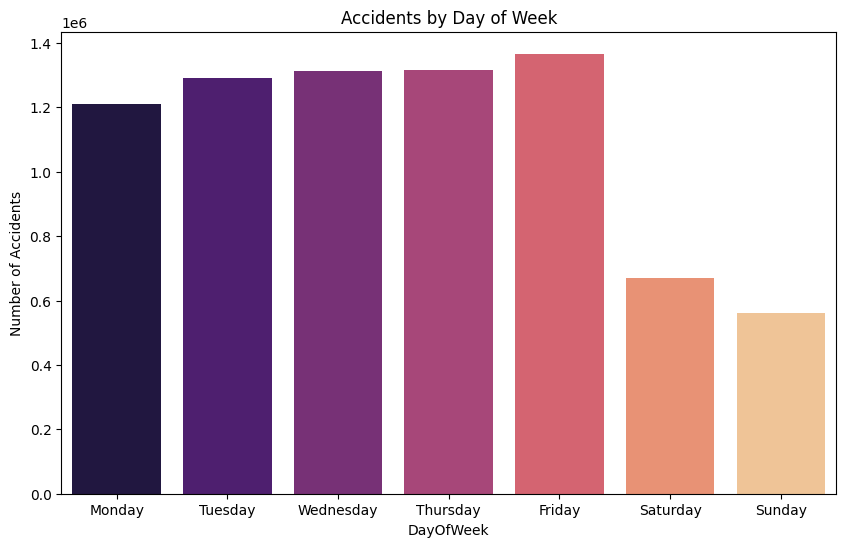

In [7]:
plt.figure(figsize=(10,6))
sns.countplot(x='DayOfWeek', data=df, order=['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday'], palette='magma')
plt.title('Accidents by Day of Week')
plt.ylabel('Number of Accidents')
plt.show()


- Weekdays (Mon–Fri) have significantly more accidents than weekends.

- Friday shows the highest number of accidents.

- Saturday & Sunday see a sharp drop (less traffic).



/tmp/ipython-input-8-2533780420.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=weather_counts.index, y=weather_counts.values, palette='viridis')


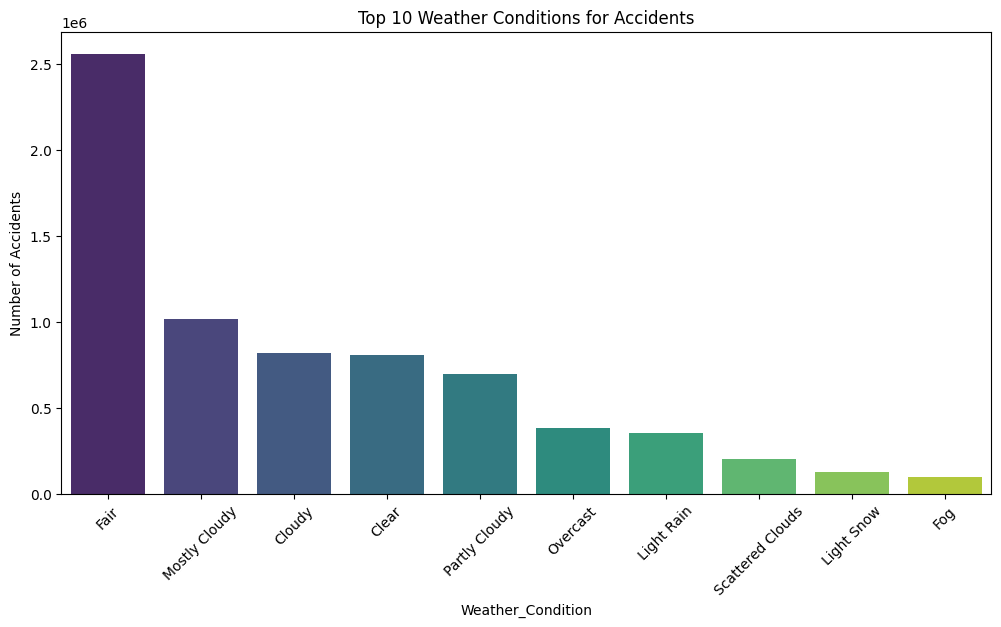

In [8]:
weather_counts = df['Weather_Condition'].value_counts().head(10)
plt.figure(figsize=(12,6))
sns.barplot(x=weather_counts.index, y=weather_counts.values, palette='viridis')
plt.title('Top 10 Weather Conditions for Accidents')
plt.xticks(rotation=45)
plt.ylabel('Number of Accidents')
plt.show()


- "Fair" weather surprisingly has the most accidents → driver behavior & traffic volume play a bigger role than bad weather.

- Other common conditions: Mostly Cloudy, Cloudy, Clear.

- Rain, Fog, Snow contribute fewer accidents but may be more severe.

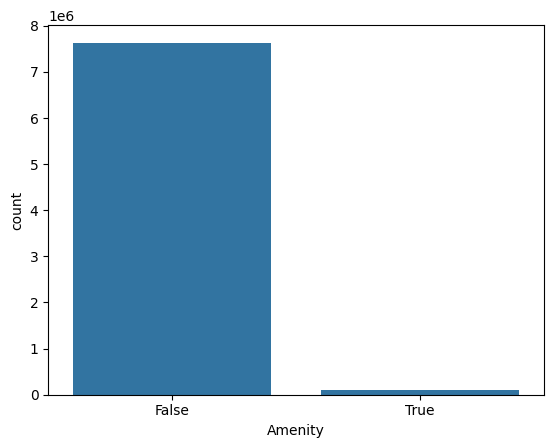

In [9]:
if 'Amenity' in df.columns:
    sns.countplot(x='Amenity', data=df)


- Majority of accidents occur away from amenities (e.g., gas stations, rest areas).

- Few near amenities → may indicate higher speeds & highways are riskier.

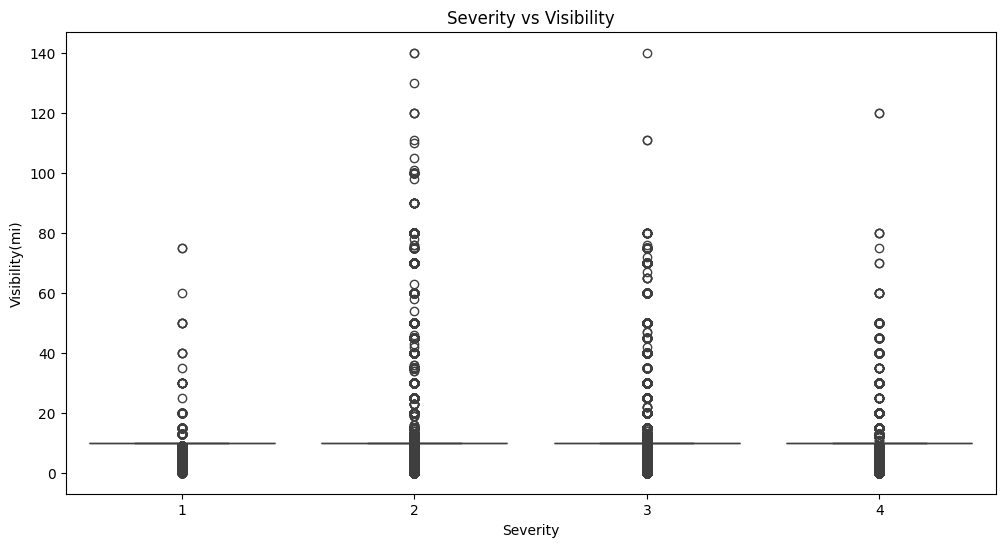

In [11]:
plt.figure(figsize=(12,6))
sns.boxplot(x='Severity', y='Visibility(mi)', data=df)
plt.title('Severity vs Visibility')
plt.show()


- No clear trend between severity level and visibility — the distribution of visibility looks very similar across all severity levels (1 to 4).

- High outliers are present in all severity categories, especially for visibility above 100 miles.

- Most of the data is concentrated below 10 miles of visibility, regardless of severity.

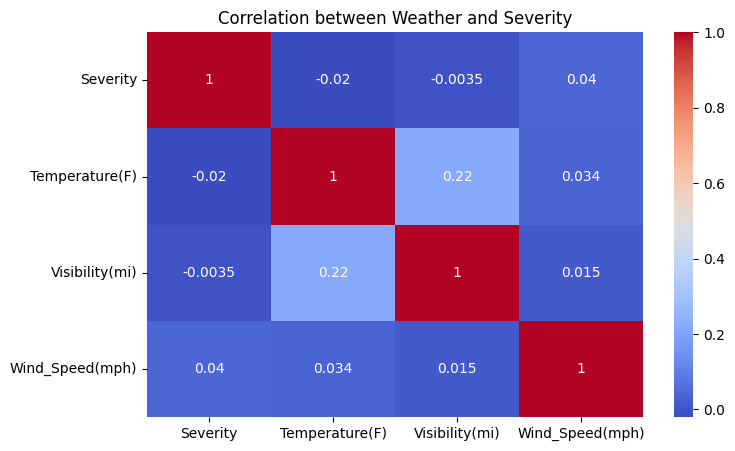

In [12]:
numeric_cols = ['Severity','Temperature(F)','Visibility(mi)','Wind_Speed(mph)']
plt.figure(figsize=(8,5))
sns.heatmap(df[numeric_cols].corr(), annot=True, cmap='coolwarm')
plt.title('Correlation between Weather and Severity')
plt.show()


- Very weak correlations between severity and weather factors:

   -->Severity and Temperature(F): -0.02

   -->Severity and Visibility(mi): -0.0035

   -->Severity and Wind_Speed(mph): 0.04

- Slight positive correlation between:

  -->Temperature and Visibility: 0.22 (meaning warmer temperatures might slightly relate to higher visibility)